<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
# Import libraries.
from IPython.display import display

import math

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

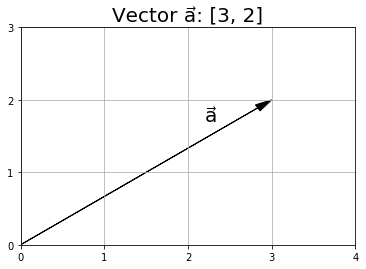

In [2]:
# Define vector a.
a = np.array([3, 2])

# Set up axes.
ax = plt.axes()
plt.grid()

# Define parameters for horizontal axis.
ax.set_xlim(0, 4)
ax.set_xticks(np.linspace(0, 4, 5))

# Define parameters for vertical axis.
ax.set_ylim(0, 3)
ax.set_yticks(np.linspace(0, 3, 4))

# Annotate plot.
plt.text(s='a\u20D7', x=2.2, y=1.7, fontsize=20)
plt.title('Vector a\u20D7: [3, 2]', fontsize=20)

# Graph vector.
ax.arrow(0, 0, a[0], a[1], head_width=0.1, head_length=0.2, 
         length_includes_head=True, color='k')

# Display and close plot.
plt.show()
plt.close()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
# Define vector b.
b = np.array([17, -4, -2, 1])

# Calculate and print norm.
print('Norm(b):', np.linalg.norm(b))

Norm(b): 17.60681686165901


> The norm of a vector represents its magnitude, or length.

In [4]:
# Define a function to recalculate the norm manually.
def norm(v):
  sum_of_squares = 0
  for vi in v:
    sum_of_squares += vi**2
  return np.sqrt(sum_of_squares)

# Recalculate and print the norm again.
print('Norm(b) - calculated manually:', norm(b))

Norm(b) - calculated manually: 17.60681686165901


> Note that this is just the standard distance formula with the origin as the start point.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
# Define vectors c and d.
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

# Calculate and print their dot product.
print('Dot product of c and d:', np.dot(c, d))

Dot product of c and d: 42


> These vectors are not orthogonal, because their dot product is not 0.

In [6]:
# Calculate the angle between vectors c and d.
angle_rad = np.arccos(np.clip(np.dot(c/np.linalg.norm(c), d/np.linalg.norm(d)), 
                          -1.0, 1.0))
angle_deg = math.degrees(angle_rad)


# Print angle.
print('Angle between c and d: {:.2f}\u00B0'.format(angle_deg))

Angle between c and d: 77.47°


> The angle between these vectors is not 90 degrees, another way of saying (and showing) that they are not orthogonal, i.e., not perpendicular.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
# Define matrix E.
E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')

In [8]:
# Calculate and print E inverse.
E_inv = np.linalg.inv(E)
print('E inverse:\n', E_inv)

E inverse:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [9]:
# Calculate and print E transpose.
print('E transpose:\n', E.T)

E transpose:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


In [10]:
# Check validity of E inverse.
print('\nE * E_inv:\n', np.matmul(E, E_inv).round(0))
print('\nE_inv * E:\n', np.matmul(E_inv, E).round(0))


E * E_inv:
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]

E_inv * E:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [11]:
# Set up data.
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

display(df.head())

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [12]:
# Calculate and print summary statistics.
print('Mean daily customers: {}'.format(np.mean(df['customers'])))
print('Mean inches snow: {}'.format(np.mean(df['snow'])))
print()
print('Customer variance: {}'.format(np.var(df['customers'], ddof=1)))
print('Snow variance: {}'.format(np.var(df['snow'], ddof=1)))
print()
print('Customer standard deviation: {}'.format(np.std(df['customers'], ddof=1)))
print('Snow standard deviation: {}'.format(np.std(df['snow'], ddof=1)))

Mean daily customers: 1135.7142857142858
Mean inches snow: 2.7142857142857144

Customer variance: 98761.90476190478
Snow variance: 8.571428571428571

Customer standard deviation: 314.26406851866597
Snow standard deviation: 2.9277002188455996


In [13]:
# Check the mean and the std from pandas.
display(df.describe().loc[['mean', 'std']])

,customers,snow
mean,1135.714286,2.714286
std,314.264069,2.927700


In [14]:
# Check the variance from pandas.
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

> No, the variance of customers and inches of snow are not comparable, firstly because they are in different units (square people vs. square inches), and secondly because they describe events at different scales.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [15]:
# Calculate and print the covariance matrix.
print('Covariance matrix:\n', np.cov(customers, snow))

Covariance matrix:
 [[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


In [16]:
# Calculate and print the correlation coefficient matrix.
print('Correlation matrix:\n', np.corrcoef(customers, snow))

Correlation matrix:
 [[1.         0.72846346]
 [0.72846346 1.        ]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [17]:
# Initialize data.
data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Preview the data.
display(df)

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [18]:
# Check summary statistics.
display(df.describe(include='all'))

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,94.250000,245.25,706.000000,130.500000,205.250000,154.25000,798.250000,208.000000,457.750000,202.000000,349.000000,967.500000,1502.500000,57.500000,1427.000000,360.750000,55.250000
std,NaN,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,NaN,66.000000,227.00,586.000000,93.000000,184.000000,139.00000,566.000000,143.000000,355.000000,187.000000,334.000000,674.000000,1462.000000,47.000000,1256.000000,135.000000,41.000000
25%,NaN,93.750000,238.25,660.250000,114.750000,190.750000,145.00000,681.500000,164.000000,402.250000,195.250000,336.250000,886.250000,1469.500000,51.500000,1344.500000,315.000000,50.750000
50%,NaN,103.000000,243.50,717.500000,134.500000,201.000000,151.50000,797.000000,212.000000,453.000000,200.500000,348.500000,1029.500000,1483.000000,55.000000,1440.000000,416.500000,58.000000
75%,NaN,103.500000,250.50,763.250000,150.250000,215.500000,160.75000,913.750000,256.000000,508.500000,207.250000,361.250000,1110.750000,1516.000000,61.000000,1522.500000,462.250000,62.500000


In [19]:
# Check datatypes.
print(df.dtypes)

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object


In [0]:
# Set target variable as index - out of the way for calculations, but still 
# handy for reference.
df = df.set_index('Country')

In [21]:
# Review data.
display(df)

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
Country,,,,,,,,,,,,,,,,,
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [22]:
# Recheck datatypes.
print(df.dtypes)

Cheese                int64
Carcass_Meat          int64
Other_Meat            int64
Fish                  int64
Fats_and_Oils         int64
Sugars                int64
Fresh_Potatoes        int64
Fresh_Veg             int64
Other_Veg             int64
Processed_Potatoes    int64
Processed_Veg         int64
Fresh_Fruit           int64
Cereals               int64
Beverages             int64
Soft_Drinks           int64
Alcoholic Drinks      int64
Confectionery         int64
dtype: object


In [23]:
# Standardize the data so that it has a mean of 0 and a standard deviation of 1.
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
display(df_scaled.describe())

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


> This looks a bit odd - the means are all zero or close enough, but the standard deviations are 1.15 instead of one. However, the documentation for StandardScaler says: "We use a biased estimator for the standard deviation, equivalent to numpy.std(x, ddof=0). Note that the choice of ddof is unlikely to affect model performance."

In [24]:
# Recalate the standard deviations with an alternate value for the degrees of 
# freedom.
df_scaled.std(ddof=0)

Cheese                1.0
Carcass_Meat          1.0
Other_Meat            1.0
Fish                  1.0
Fats_and_Oils         1.0
Sugars                1.0
Fresh_Potatoes        1.0
Fresh_Veg             1.0
Other_Veg             1.0
Processed_Potatoes    1.0
Processed_Veg         1.0
Fresh_Fruit           1.0
Cereals               1.0
Beverages             1.0
Soft_Drinks           1.0
Alcoholic Drinks      1.0
Confectionery         1.0
dtype: float64

> This matches up, then.

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [25]:
# Perform principal component analysis on the data.
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled), 
                      index=df_scaled.index, 
                      columns=['PC1', 'PC2'])

# Output calculated parameters.
print('\nEigenvectors:\n', pca.components_)
print('\nEigenvalues:\n', pca.explained_variance_)
print('\nExplained Variance Ratios:', pca.explained_variance_ratio_)
print('\nTotal Explained Variance Ratio:', sum(pca.explained_variance_ratio_))

# Display transformed dataframe.
print("\nProjected Data: \n")
display(df_pca)


Eigenvectors:
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]]

Eigenvalues:
 [15.48765084  5.63749203]

Explained Variance Ratios: [0.68327871 0.24871288]

Total Explained Variance Ratio: 0.9319915970724626

Projected Data: 



,PC1,PC2
Country,,
England,-0.954490,0.328318
Wales,-4.520951,-1.735380
Scotland,0.487978,3.233672
North Ireland,4.987462,-1.826611


In [0]:
# Define function to read images from file.
def getImage(path):
    return OffsetImage(plt.imread(path))

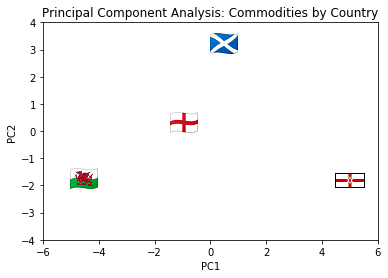

In [27]:
# Set up basic scatter plot.
fig, ax = plt.subplots()
ax.scatter(x=df_pca['PC1'], y=df_pca['PC2'])

# Title plot.
plt.title('Principal Component Analysis: Commodities by Country')

# Configure horizontal axis.
plt.xlabel('PC1')
plt.xlim(-6, 6)

# Configure vertical axis.
plt.ylabel('PC2')
plt.ylim(-4, 4)

# Map to image files.
paths = ['england.png',
         'wales.png',
         'scotland.png',
         'ulster.png',]

# Replace point markers with flags.
for x, y, path in zip(df_pca['PC1'], df_pca['PC2'], paths):
    ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
    ax.add_artist(ab)

#Display plot.
plt.show()
plt.close()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [28]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/'
                     'master/points.csv')
display(points.head())

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [29]:
# Check summary statistics.
display(points.describe())

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054
